### Importing Libraries

In [1]:
#importing the libraries

import pandas as pd
import numpy as np

import time, warnings
import datetime as dt

#visualizations
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns


#algorithm
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import warnings
warnings.filterwarnings('ignore')

### Loading & Reading the Data

In [2]:
data=pd.read_excel('D:/Sem 3/Capstone/Online Retail.xlsx')

In [3]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [4]:
data.tail(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541899,581587,22726,ALARM CLOCK BAKELIKE GREEN,4,2011-12-09 12:50:00,3.75,12680.0,France
541900,581587,22730,ALARM CLOCK BAKELIKE IVORY,4,2011-12-09 12:50:00,3.75,12680.0,France
541901,581587,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-12-09 12:50:00,1.95,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
data.sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
302930,C563483,23108,SET OF 10 LED DOLLY LIGHTS,-1,2011-08-16 15:59:00,6.25,14175.0,United Kingdom
446921,574936,84971S,SMALL HEART FLOWERS HOOK,5,2011-11-07 17:06:00,0.85,13066.0,United Kingdom
323140,565246,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-09-02 10:27:00,1.65,12408.0,Belgium
251397,559052,23310,BUBBLEGUM RING ASSORTED,1,2011-07-05 16:53:00,0.83,NaN,United Kingdom
146444,548987,21625,VINTAGE UNION JACK APRON,3,2011-04-05 12:50:00,6.95,14535.0,United Kingdom
172790,551559,22755,SMALL PURPLE BABUSHKA NOTEBOOK,72,2011-05-03 10:42:00,0.72,16133.0,United Kingdom
341092,566734,21034,REX CASH+CARRY JUMBO SHOPPER,1,2011-09-14 14:09:00,0.95,16910.0,United Kingdom
15119,537638,21161,KEEP OUT BOYS DOOR HANGER,2,2010-12-07 15:28:00,3.36,NaN,United Kingdom
485517,577609,22722,SET OF 6 SPICE TINS PANTRY DESIGN,4,2011-11-21 09:51:00,3.95,12349.0,Italy
481623,577358,23506,MINI PLAYING CARDS SPACEBOY,1,2011-11-18 15:59:00,0.83,NaN,United Kingdom


### Data Information:

In [6]:
data.shape

(541909, 8)

In [7]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [9]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
print("Number of transactions: ",data['InvoiceNo'].nunique())
print("Number of products bought: ",data['StockCode'].nunique())
print("Number of customers: ",data['CustomerID'].nunique())
print('Number of countries: ',data['Country'].nunique())

Number of transactions:  25900
Number of products bought:  4070
Number of customers:  4372
Number of countries:  38


### Data Preprocessing:

#### 1) Null Removal:

In [11]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [12]:
data.dropna(inplace=True)
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### 2) Using the positive ‘Quantity’ values only:

In [13]:
data=data[data['Quantity']>0]
data.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


We can see that the negative values are gone.

In [14]:
data.shape

(397924, 8)

#### 3) Date Conversion:

data['Date'] = [d.date() for d in data['InvoiceDate']]
data['Time'] = [d.time() for d in data['InvoiceDate']]
data

In [15]:
data['YearMonth'] = data['InvoiceDate'].map(lambda x: 100*x.year + x.month)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012


In [16]:
data.shape

(397924, 9)

#### 4) Creating new column:

In [17]:
data['AllPrice']= data['Quantity']*data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,YearMonth,AllPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,201012,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,201012,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,201012,20.34


In [18]:
print("Number of transactions: ",data['InvoiceNo'].nunique())
print("Number of products bought: ",data['StockCode'].nunique())
print("Number of customers: ",data['CustomerID'].nunique())
print('Number of countries: ',data['Country'].nunique())

Number of transactions:  18536
Number of products bought:  3665
Number of customers:  4339
Number of countries:  37


### EDA:

#### 1) Top 5 Most common countries:

Text(0.5, 1.0, 'Top 5 famous Countries')

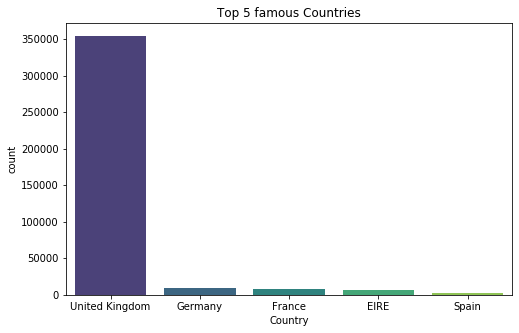

In [19]:
plt.figure(figsize=(8,5))
fig=sns.countplot(x=data['Country'], order=data['Country'].value_counts()[:5].index,palette='viridis')
plt.xticks(fig.get_xticks())
plt.title('Top 5 famous Countries')

#### Observation:
•	The graph shows 5 most common countries in the database.<br>
•	United Kingdom is the most popular one.

#### 2) Revenue by each Country:

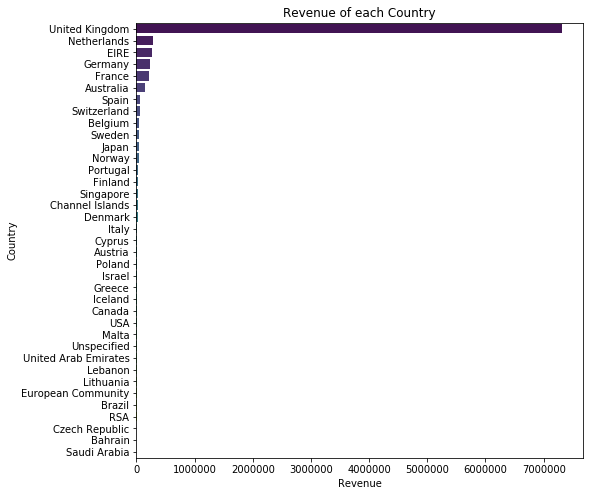

In [20]:
revenue=data.groupby('Country').sum()['AllPrice'].sort_values(ascending=False)
fig, ax=plt.subplots(figsize=(8,8))
sns.barplot(x=revenue.values, y= revenue.index,palette='viridis')
plt.title('Revenue of each Country')
plt.xlabel('Revenue')
plt.show()

#### Observation:
•	We can see from the graph that heighest revenue is generated from United Kingdom followed by Netherlands, Eire, France and     Australia.

#### 3) Top 5 countries by Total Quantity sold

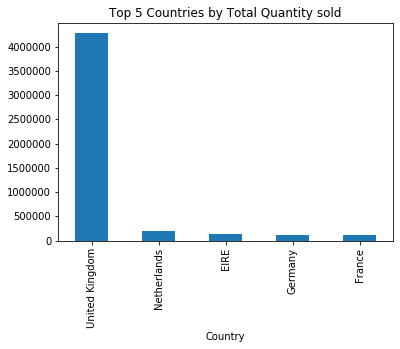

In [21]:
data.groupby('Country')['Quantity'].sum().sort_values(ascending=False)[:5].plot(kind='bar',title='Top 5 Countries by Total Quantity sold')

#### Observation:
•	The graph shows top 5 countries where the more goods are sold. 

#### 4)Top 5 countries by Total UnitPrice:

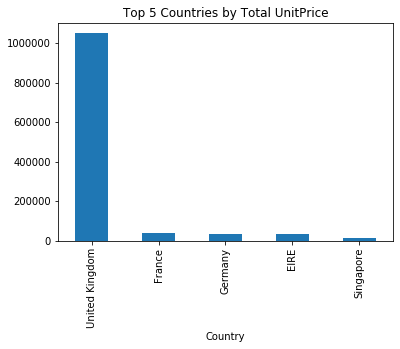

In [22]:
data.groupby('Country')['UnitPrice'].sum().sort_values(ascending=False)[:5].plot(kind='bar',title='Top 5 Countries by Total UnitPrice')

#### Observation:
•	The above graph shows top 5 countries where the unit price is high.

#### 5)Top 10 Products purchased:

Text(0.5, 1.0, 'Top 10 Products')

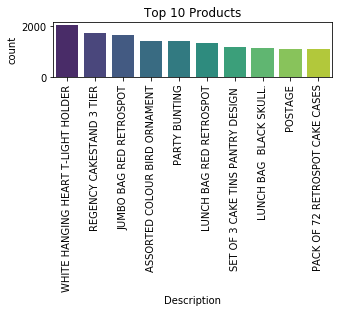

In [23]:
plt.figure(figsize=(5,1))
fig=sns.countplot(x=data['Description'], order=data['Description'].value_counts()[:10].index,palette='viridis')
plt.xticks(fig.get_xticks(), rotation=90)
plt.title('Top 10 Products')

#### Observation:
•	The graph shows top 10 products that are being purchased. <br>
•	WHITE HANGING HEART T-LIGHT HOLDER is the highest selling product followed by REGENCY CAKESTAND 3 TIER, JUMBO BAG RED RETROSPOT. These are the three highest selling products.

#### 6)Total quantity purchased by each InvoiceNo (Top 10):

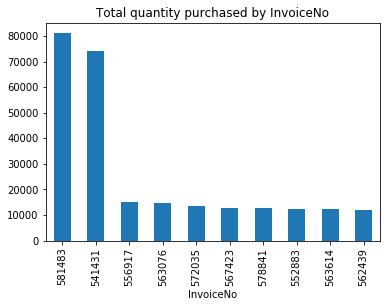

In [24]:
data.groupby('InvoiceNo')['Quantity'].sum().sort_values(ascending=False)[:10].plot(kind='bar',title='Total quantity purchased by InvoiceNo')

#### Observation: 
•	The graph shows total quantity sold by invoice no with InvoiceNo. 581483 being the highest.

#### 7)Busiest Hour of the day:

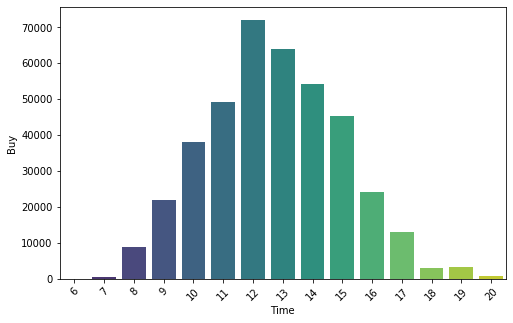

In [25]:
hour=data.set_index('InvoiceDate').groupby(lambda date: date.hour).count()['CustomerID']
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(x = hour.index, y = hour.values, palette = 'viridis')
plt.xlabel("Time")
plt.ylabel("Buy")
plt.xticks(rotation=45)
plt.show()

#### Observation:
•	We can infer from the graph that the busiest hour of the day is between 10:00 am to 15:00 pm. <br>
•	So the retailer can make strategies to boost the sale.

#### 8) Revenue by Month:

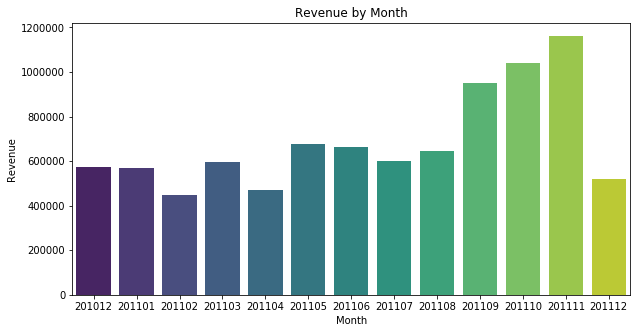

In [26]:
revenue_month=data.set_index('InvoiceDate').groupby('YearMonth').sum()['AllPrice']
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x = revenue_month.index, y =revenue_month.values, palette = 'viridis')
plt.title('Revenue by Month')
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

#### Observation:
•	We can see that Novemeber is the busiest month of the year. <br>
•	We can infer that due to holiday'festivals people tend to shop in december so we can make startegies to accelerate the sale.

### Experiment:

#### 1) Creating the Basket:

In [27]:
#stricting the data for UK only:
    
data1= (data[data['Country']=='United Kingdom'].groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo'))
data1.head(5)

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 2) Encoding the data:

In [28]:
#encoding the data:
def encode(i):
    if i <= 0:
        return 0
    if i >= 1:
        return 1
data_encode = data1.applymap(encode)
data_encode

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 3)Filtering the data:

In [29]:
#filtering the data:
data_filter=data_encode[(data_encode>0).sum(axis=1)>=2]
data_filter

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536376,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 4)Applying the Apriori Algorithm: 

In [30]:
frequent_itemset = apriori(data_filter, min_support = 0.02, 
                           use_colnames =  True).sort_values('support', ascending= False).reset_index(drop=True)
frequent_itemset['length'] = frequent_itemset['itemsets'].apply(lambda x: len(x))
frequent_itemset

,support,itemsets,length
0,0.121358,(WHITE HANGING HEART T-LIGHT HOLDER),1
1,0.093197,(JUMBO BAG RED RETROSPOT),1
2,0.090466,(REGENCY CAKESTAND 3 TIER),1
3,0.084417,(ASSORTED COLOUR BIRD ORNAMENT),1
4,0.082986,(PARTY BUNTING),1
5,0.072841,(LUNCH BAG RED RETROSPOT),1
6,0.064971,(SET OF 3 CAKE TINS PANTRY DESIGN ),1
7,0.064646,(LUNCH BAG BLACK SKULL.),1
8,0.061004,(PAPER CHAIN KIT 50'S CHRISTMAS ),1
9,0.060939,(NATURAL SLATE HEART CHALKBOARD ),1


#### 5)Finding the associations:

In [31]:
association_rules(frequent_itemset, metric='lift',
                 min_threshold = 1).sort_values('lift', ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",(PINK REGENCY TEACUP AND SAUCER),0.030957,0.031803,0.022177,0.716387,22.525889,0.021193,3.413792
1,(PINK REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER , GREEN REGEN...",0.031803,0.030957,0.022177,0.697342,22.525889,0.021193,3.201769
2,"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",(GREEN REGENCY TEACUP AND SAUCER),0.024909,0.039802,0.022177,0.890339,22.369051,0.021186,8.756089
3,(GREEN REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER , PINK REGENC...",0.039802,0.024909,0.022177,0.557190,22.369051,0.021186,2.202051
4,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.039802,0.031803,0.026275,0.660131,20.756994,0.025009,2.848734
5,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.031803,0.039802,0.026275,0.826176,20.756994,0.025009,5.523961
6,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX ),0.030372,0.032908,0.020356,0.670236,20.366683,0.019357,2.932674
7,(SPACEBOY LUNCH BOX ),(DOLLY GIRL LUNCH BOX),0.032908,0.030372,0.020356,0.618577,20.366683,0.019357,2.542133
8,"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",(ROSES REGENCY TEACUP AND SAUCER ),0.026275,0.043900,0.022177,0.844059,19.227048,0.021024,6.131184
9,(ROSES REGENCY TEACUP AND SAUCER ),"(PINK REGENCY TEACUP AND SAUCER, GREEN REGENCY...",0.043900,0.026275,0.022177,0.505185,19.227048,0.021024,1.967858


### Conclusion:

In this project, I’ve done Market Basket Analysis using Apriori Algorithm using the online retail dataset. The result of this analysis can be used for decision making and for marketing strategies. Insights gained from the above experiment are:<br>
i.	Placements: <br>
Since the lift for GREEN REGENCY TEACUP AND SAUCER and PINK REGENCY TEACUP AND SAUCER is the highest, we can place them side by side in stores.<br>
ii.	Recommendations: <br>
Whenever a customer puts GREEN REGENCY TEACUP AND SAUCER in the cart, we could recommend him to buy PINK REGENCY TEACUP AND SAUCER.<br>
iii.	Discounts:<br>
Whenever a customer buys GREEN REGENCY TEACUP AND SAUCER, we can give him discount if he buys PINK REGENCY TEACUP AND SAUCER.<br>
iv.	Bundling: <br>
We can bundle both the products as single product at lower price as compared to the sum of both the products.<br>
Thus, helping to generate more income and accelerate sales.
